<a href="https://colab.research.google.com/github/Deepak14ap/LitSocWebsite/blob/master/FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras is a powerful and easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano, CNTK and TensorFlow and allows you to define and train neural network models in a few short lines of code. In this tutorial you will discover how to create your first neural network model in Python using Keras. After completing this lesson you will know:


*   How to load a dataset for use with Keras.
*   How to define and compile a Multilayer Perceptron model in Keras.
*   How to evaluate a Keras model on a validation dataset.



# Load Libraries

First step is to load the required libraries.

In [ ]:
import numpy 

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into three parts: $60,000$ data points of training data, and $10,000$ points of test data. Each image is 28 pixels by 28 pixels.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

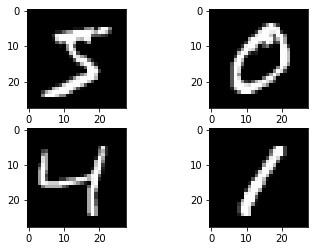

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data and Labels for Keras

We can flatten this array into a vector of $28\times28 = 784$ numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space. The data should always be of the format (Number of data points, data point dimension). In this case the training data will be of format $60,000\times784$.

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255 

X_test = X_test / 255

y_train = to_categorical(y_train)  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] (60000, 1) (60000, 10)

y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

# Defining a single layer neural network model

Here we will define a single layer neural network. It will have a input layer of $784$ neurons, i.e. the input dimension and output layer of $10$ neurons, i.e. number of classes. The activation function used will be softmax activation.

In [ ]:
# create model

model = Sequential()   # 784 10

model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss with Adam optimizer and accuracy as a metric.

In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

In [ ]:
# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 1.2364 - accuracy: 0.6646 - val_loss: 0.4353 - val_accuracy: 0.8939
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.8884 - val_loss: 0.3473 - val_accuracy: 0.9075
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.9036 - val_loss: 0.3160 - val_accuracy: 0.9138
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.9106 - val_loss: 0.2987 - val_accuracy: 0.9188
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3055 - accuracy: 0.9167 - val_loss: 0.2893 - val_accuracy: 0.9204
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2972 - accuracy: 0.9175 - val_loss: 0.2809 - val_accuracy: 0.9216
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9216 - val_loss: 0.2779 - val_accuracy: 0.9218
Epoch 

# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9258
Baseline Error: 7.42%


# Defining a multi-layer model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(num_classes, activation='softmax')) 


In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.4961 - accuracy: 0.8590 - val_loss: 0.1290 - val_accuracy: 0.9602
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1055 - accuracy: 0.9685 - val_loss: 0.0821 - val_accuracy: 0.9749
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0426 - accuracy: 0.9878 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0725 - val_accuracy: 0.9760
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0706 - val_accuracy: 0.9791
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0701 - val_accuracy: 0.9803

# Defining a deep model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [ ]:
model = Sequential()  

model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))

model.add(Dense(50, activation = 'sigmoid'))

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 15ms/step - loss: 1.5274 - accuracy: 0.5747 - val_loss: 0.3672 - val_accuracy: 0.9107
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3203 - accuracy: 0.9185 - val_loss: 0.2253 - val_accuracy: 0.9369
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2040 - accuracy: 0.9440 - val_loss: 0.1709 - val_accuracy: 0.9520
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1514 - accuracy: 0.9582 - val_loss: 0.1396 - val_accuracy: 0.9611
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1185 - accuracy: 0.9659 - val_loss: 0.1154 - val_accuracy: 0.9658
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0912 - accuracy: 0.9743 - val_loss: 0.1003 - val_accuracy: 0.9706
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0748 - accuracy: 0.9792 - val_loss: 0.0919 - val_accuracy: 0.9724

# Analyzing Model Summary

The following function provides us with detailed summary of the model. We can use it after we have defined
our model.

In [ ]:
model.summary()   784*500+500

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 448,160
Trainable params: 448,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import h5py

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

model.save_weights('FC.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.0253 - accuracy: 0.9935 - val_loss: 0.0725 - val_accuracy: 0.9797
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0179 - accuracy: 0.9958 - val_loss: 0.0791 - val_accuracy: 0.9783
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0690 - val_accuracy: 0.9807
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.0713 - val_accuracy: 0.9806
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0794 - val_accuracy: 0.9791
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.0775 - val_accuracy: 0.9782

# Loading the saved model

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))

model.add(Dense(50, activation = 'sigmoid'))

model.add(Dense(num_classes, activation='softmax'))

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.4290 - accuracy: 0.0921
Baseline Error: 90.42%


In [ ]:
model.load_weights('FC.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9793
Baseline Error: 2.07%


# Creating checkpoints of model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath='FC.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=callbacks_list)

Epoch 1/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0897 - val_accuracy: 0.9775
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0895 - val_accuracy: 0.9803
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0859 - val_accuracy: 0.9810
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0784 - val_accuracy: 0.9822
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 8.0437e-04 - accuracy: 0.9999 - val_loss: 0.0812 - val_accuracy: 0.9824
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 6.7121e-04 - accuracy: 0.9999 - val_loss: 0.0797 - val_accuracy: 0.9825
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 4.4782e-04 - accuracy: 1.0000 - val_loss: 0.0814 - val_accu

# Defining Learning Rate Decay and Other Parameters of Optimizer

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.001, momentum = 0.0005, decay = 0.0005)   # 0.001  to 0.000001

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0918 - val_accuracy: 0.9811
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 8.6285e-04 - accuracy: 0.9998 - val_loss: 0.0862 - val_accuracy: 0.9821
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 2.4225e-04 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9828
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 1.4980e-04 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 0.9830
Epoch 5/10
300/300 [==============================] - 4s 14ms/step - loss: 1.2104e-04 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9828
Epoch 6/10
300/300 [==============================] - 4s 15ms/step - loss: 1.1450e-04 - accuracy: 1.0000 - val_loss: 0.0875 - val_accuracy: 0.9830
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 9.2946e-05 - accuracy: 1.0000 - val_loss: 0.088

# Defining Regularizers for the model

Here we will add dropout and weight decay regularizations in the model

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = Sequential() 

model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))

model.add(Dropout(0.3))

model.add(Dense(100, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))

model.add(Dropout(0.25))

model.add(Dense(50, activation = 'sigmoid', kernel_regularizer=regularizers.l2(1e-4)))

model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))

In [ ]:
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 16ms/step - loss: 1.8676 - accuracy: 0.3907 - val_loss: 0.6432 - val_accuracy: 0.8772
Epoch 2/10
300/300 [==============================] - 5s 16ms/step - loss: 0.7163 - accuracy: 0.8450 - val_loss: 0.4491 - val_accuracy: 0.9173
Epoch 3/10
300/300 [==============================] - 5s 16ms/step - loss: 0.5630 - accuracy: 0.8891 - val_loss: 0.3997 - val_accuracy: 0.9270
Epoch 4/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4990 - accuracy: 0.9080 - val_loss: 0.3586 - val_accuracy: 0.9409
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4580 - accuracy: 0.9172 - val_loss: 0.3468 - val_accuracy: 0.9458
Epoch 6/10
300/300 [==============================] - 5s 17ms/step - loss: 0.4347 - accuracy: 0.9243 - val_loss: 0.3309 - val_accuracy: 0.9509
Epoch 7/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4138 - accuracy: 0.9312 - val_loss: 0.3244 - val_accuracy: 0.9512

# Defining Initialization for the model

Here we will add dropout and glorot normal initialization in the model

In [ ]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))

model.add(Dense(100, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))

model.add(Dense(50, activation = 'sigmoid', kernel_initializer=initializers.GlorotNormal()))

model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializers.GlorotNormal()))

In [ ]:
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 1.5988 - accuracy: 0.5690 - val_loss: 0.3801 - val_accuracy: 0.9106
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3308 - accuracy: 0.9168 - val_loss: 0.2273 - val_accuracy: 0.9398
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2090 - accuracy: 0.9443 - val_loss: 0.1712 - val_accuracy: 0.9515
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1488 - accuracy: 0.9590 - val_loss: 0.1348 - val_accuracy: 0.9617
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1141 - accuracy: 0.9694 - val_loss: 0.1115 - val_accuracy: 0.9666
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0915 - accuracy: 0.9750 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0749 - accuracy: 0.9786 - val_loss: 0.0911 - val_accuracy: 0.9726